# Algorithmic Trading using Machine Learning

**MS** **in** **Applied** **Data** **Science,** **University** **of** **Southern** **California**

Comparing the performance of forecasting time series data using ARIMA and Recurrent Neural Network such as LSTM Architecture. Here, I will be forecasting the Close price of Next few days using concept of moving window i.e taking few past days and predicting the next day's Close Price. Similarly, appending that result into test data to predict next day's Close Price.

In [15]:
#Importing Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

In [16]:
#Fetching the Stock Data
end=datetime.now()
start=datetime(end.year - 5, end.month, end.day)
stock_data=pdr.DataReader("CIDM", data_source="yahoo",start=start,end=end)
stock_data.shape

(1259, 6)

In [17]:
stock_data.describe

<bound method NDFrame.describe of             High   Low  Open  Close      Volume  Adj Close
Date                                                      
2016-05-02  2.20  1.80  1.80   2.00     53950.0       2.00
2016-05-03  2.10  2.00  2.10   2.10     26080.0       2.10
2016-05-04  2.70  2.00  2.20   2.70    186860.0       2.70
2016-05-05  2.70  2.20  2.70   2.20     65730.0       2.20
2016-05-06  2.20  2.10  2.20   2.10     14500.0       2.10
...          ...   ...   ...    ...         ...        ...
2021-04-26  1.60  1.32  1.33   1.48  86135600.0       1.48
2021-04-27  1.58  1.41  1.48   1.52  72244800.0       1.52
2021-04-28  1.58  1.48  1.51   1.51  57315900.0       1.51
2021-04-29  1.55  1.44  1.52   1.48  54979100.0       1.48
2021-04-30  1.54  1.43  1.46   1.44  65764600.0       1.44

[1259 rows x 6 columns]>

In [18]:
#Printing the last 5 days stock data
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-26,1.60,1.32,1.33,1.48,86135600.0,1.48
2021-04-27,1.58,1.41,1.48,1.52,72244800.0,1.52
2021-04-28,1.58,1.48,1.51,1.51,57315900.0,1.51
2021-04-29,1.55,1.44,1.52,1.48,54979100.0,1.48
2021-04-30,1.54,1.43,1.46,1.44,65764600.0,1.44


In [19]:
#Reset the Index
stock_data1=stock_data.reset_index()['Close']
stock_data1

0       2.00
1       2.10
2       2.70
3       2.20
4       2.10
        ... 
1254    1.48
1255    1.52
1256    1.51
1257    1.48
1258    1.44
Name: Close, Length: 1259, dtype: float64

# **EXPLORATORY DATA ANALYSIS**

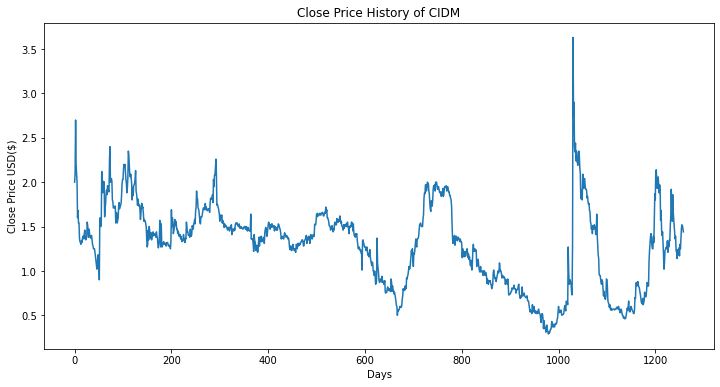

In [20]:
#Plotting the Close Price of the CIDM till today
plt.figure(figsize=(12,6))
plt.title("Close Price History of CIDM",fontsize=12)
plt.plot(stock_data1)
plt.xlabel("Days",fontsize=10)
plt.ylabel("Close Price USD($)",fontsize=10)
plt.show()

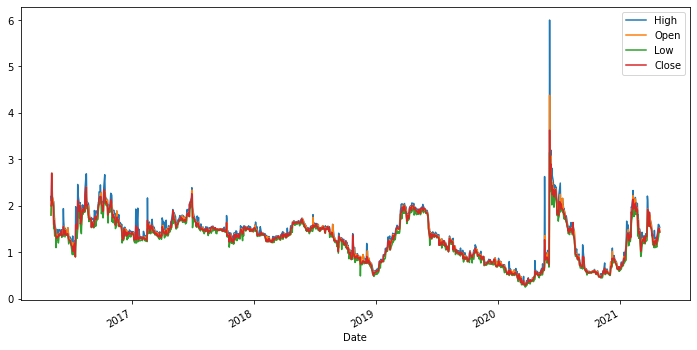

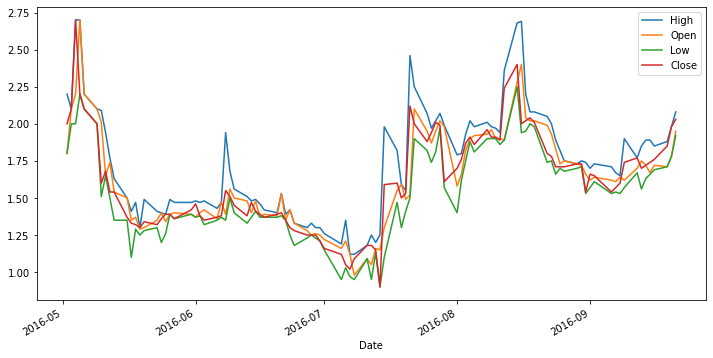

In [21]:
#Evolution of Few Features over time
features = ['High', 'Open', 'Low','Close']
plot_features = stock_data[features]
a=plot_features.plot(subplots=False, figsize=(12,6))

#Lets look at Trend in Few Data
plot_features2 = stock_data[features][:100]
b=plot_features2.plot(subplots=False, figsize=(12,6))

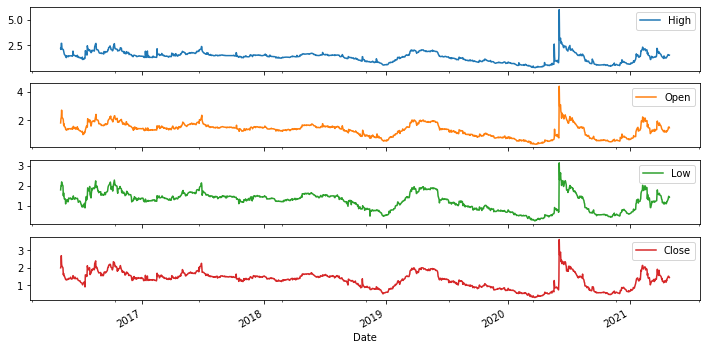

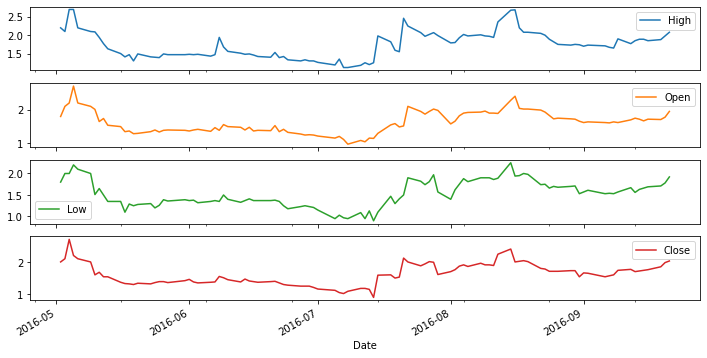

In [22]:
#Lets have a look at individual features
c = plot_features.plot(subplots=True, figsize=(12,6))
d= plot_features2.plot(subplots=True, figsize=(12,6))

**Auto Correlation Map**

 The autocorrelation function (ACF) measures how time series data is correlated with itself at different lags.


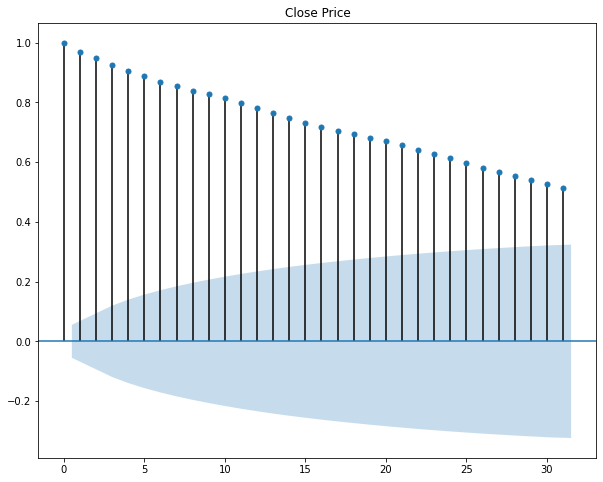

In [23]:
# Autocorrelation Map of Close Price
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data1,lags=31,title="Close Price")
plt.show()


**Partial Auto Correlation Map**

The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

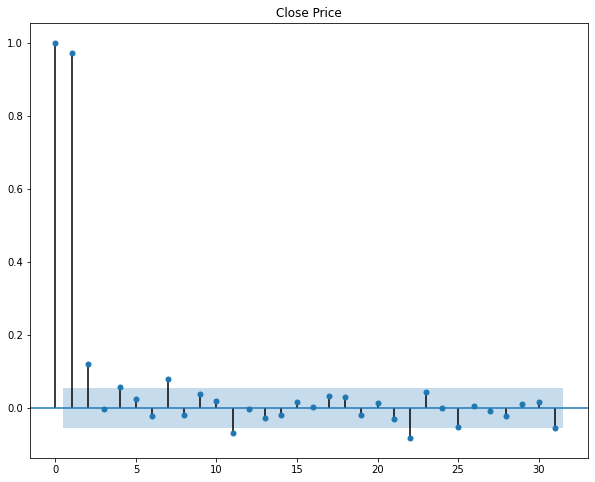

In [24]:
#Partial Auto Correlation Map for Close Price 
plot_pacf(stock_data1,lags=31,title="Close Price") # Checking for 30,60,90,120 Days
plt.show()

Here, As the Time Step Increases from 1st day to 11th day the relation with the 1st data is decreasing .

**Trends and Seasonality**

Trend - To check consistent upwards or downwards slope of a time series

Seasonality - To see clear periodic pattern of a time series

In [25]:
#importing necessary libraries for plotting time series data trends
from pylab import rcParams
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm

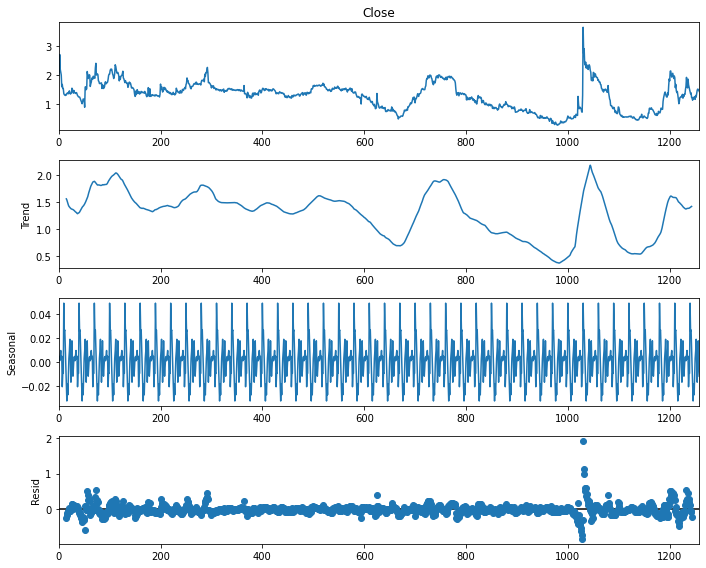

In [26]:
#Decomposing the data for checking Trend and Seasonality of Close price 
rcParams['figure.figsize'] = 10,8
close_trend = sm.tsa.seasonal_decompose(stock_data1,freq=30) 
figure = close_trend.plot()
plt.show()

**Dickey-Fuller Test**

To Check wheather the time series data is stationary or not?

In [27]:
#Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
   
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

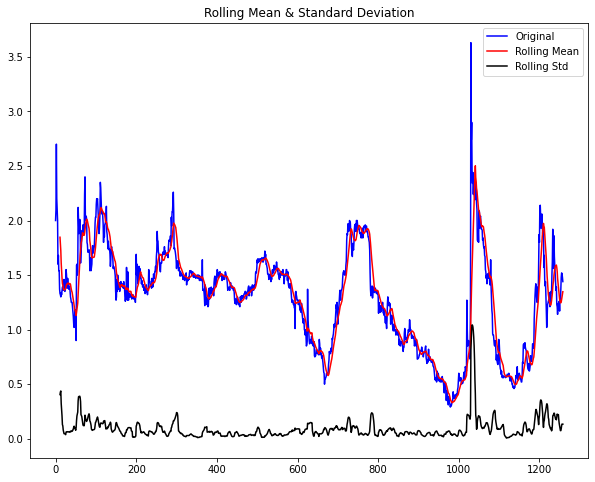

Results of Dickey-Fuller Test:
Test Statistic                   -3.280133
p-value                           0.015790
#Lags Used                       10.000000
Number of Observations Used    1248.000000
Critical Value (1%)              -3.435601
Critical Value (5%)              -2.863859
Critical Value (10%)             -2.568004
dtype: float64
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [28]:
#Checking Stationarity for Temperature Data
test_stationarity(stock_data1)

# **Univariate Forecasting using Statsmodel-ARIMA**


In [29]:
#pip install pmdarima

In [30]:
#Implementing Auto ARIMA for Statistics of ARIMA model (2,1,2)
from pmdarima import auto_arima

stepwise_fit = auto_arima(stock_data1,seasonal=False)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 998.241
Date:                Sun, 02 May 2021   AIC                          -1990.482
Time:                        02:07:51   BIC                          -1975.070
Sample:                             0   HQIC                         -1984.690
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3966      0.072      5.527      0.000       0.256       0.537
ma.L1         -0.5397      0.069     -7.851      0.000      -0.674      -0.405
sigma2         0.0120   6.81e-05    175.780      0.000       0.012       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):           1845716.12
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                             8.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       189.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#Splitting the dataset into Training and Testing Data ( 70-30 %)
train = stock_data1.iloc[:881]
test = stock_data1.iloc[881:]


In [32]:
#Shape of the Data
train.shape , test.shape

((881,), (378,))

In [33]:
#Importing Necessary Libraries for ARIMA
from statsmodels.tsa.arima_model import ARIMA

#Fitting ARIMA Model for Predicting the Close Price 
model = ARIMA(train, order=(1,2,1))
arima = model.fit()
print(arima.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  879
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 962.926
Method:                       css-mle   S.D. of innovations              0.081
Date:                Sun, 02 May 2021   AIC                          -1917.851
Time:                        02:07:52   BIC                          -1898.736
Sample:                             2   HQIC                         -1910.541
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.228e-06   9.21e-06      0.133      0.894   -1.68e-05    1.93e-05
ar.L1.D2.Close    -0.1612      0.033     -4.839      0.000      -0.226      -0.096
ma.L1.D2.Close    -1.0000      0.003

In [34]:
#Predicting the Temperature on basis of Test Data
predict = arima.predict(start=len(train), end= (len(train) + len(test) - 1), typ='levels')

In [35]:
#Predicted Close Price Value of Test Data
predict

881     1.004173
882     1.002840
883     1.002396
884     1.001810
885     1.001248
          ...   
1254    0.876600
1255    0.876490
1256    0.876380
1257    0.876272
1258    0.876165
Length: 378, dtype: float64

In [36]:
#Fitting ARIMA Model for Forecasting the Close Price 
model2 = ARIMA(stock_data1, order=(1,2,1))
arima2 = model2.fit()
print(arima2.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1257
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 990.777
Method:                       css-mle   S.D. of innovations              0.110
Date:                Sun, 02 May 2021   AIC                          -1973.553
Time:                        02:07:53   BIC                          -1953.007
Sample:                             2   HQIC                         -1965.832
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.286e-06   7.47e-06      0.440      0.660   -1.14e-05    1.79e-05
ar.L1.D2.Close    -0.1397      0.028     -5.000      0.000      -0.194      -0.085
ma.L1.D2.Close    -1.0000      0.002

In [37]:
#Forecasting Close Price for Next 7 Days
future_predictions = arima2.predict(start=len(stock_data1),end=len(stock_data1) + 7,typ='levels')

In [38]:
#Forecasted Temperature Value of Test Data
future_predictions
output = pd.DataFrame(future_predictions)
output.columns=["Forecasted Close Price"]

In [39]:
print("""Next 7 Days Forecasted Close Price""")
#Creating a Table to store the above output.

from tabulate import tabulate
print(tabulate(output,headers="keys",tablefmt="fancy_grid"))

Next 7 Days Forecasted Close Price
╒══════╤══════════════════════════╕
│      │   Forecasted Close Price │
╞══════╪══════════════════════════╡
│ 1259 │                  1.44747 │
├──────┼──────────────────────────┤
│ 1260 │                  1.44831 │
├──────┼──────────────────────────┤
│ 1261 │                  1.45008 │
├──────┼──────────────────────────┤
│ 1262 │                  1.45172 │
├──────┼──────────────────────────┤
│ 1263 │                  1.45338 │
├──────┼──────────────────────────┤
│ 1264 │                  1.45505 │
├──────┼──────────────────────────┤
│ 1265 │                  1.45672 │
├──────┼──────────────────────────┤
│ 1266 │                  1.45839 │
╘══════╧══════════════════════════╛


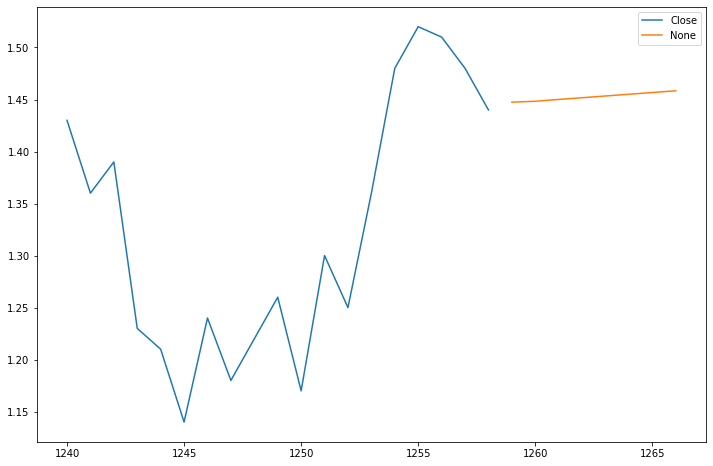

In [40]:
#Forecasted Close Price Graph
stock_data1[1240:].plot(legend=True,figsize=(12,8))
future_predictions.plot(legend=True)

**Model Evaluation**

In [41]:
#Calculating Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(predict, test)
print("Mean Absolute Error:",MAE)

Mean Absolute Error: 0.4514651864480673


**PART 2 : UNIVARIATE STOCK MARKET PRICE PREDICTION USING LSTM**

In [42]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
stock_data1=scale.fit_transform(np.array(stock_data1).reshape(-1,1))
print("Scaled Close Price:",stock_data1)

Scaled Close Price: [[1.53380177]
 [1.75140745]
 [3.05704309]
 ...
 [0.46753289]
 [0.40225118]
 [0.31520891]]


Taking 70% of total data as training data and 30% as testing data.

In [43]:
##splitting dataset into train and test split
train_size=int(len(stock_data1)*0.70)
test_size=len(stock_data1)-train_size
train_data,test_data=stock_data1[0:train_size,:],stock_data1[train_size:len(stock_data1),:1]

In [44]:
#Size of Train & Test Data
train_size,test_size

(881, 378)

In [45]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_stamp=1):
	X, y = [], []
	for i in range(len(dataset)-time_stamp-1):
		a = dataset[i:(i+time_stamp), 0]    
		X.append(a)
		y.append(dataset[i + time_stamp, 0])
	return numpy.array(X), numpy.array(y)

Here, I took Time Stamp of 90 past days and Prediction Stamp of next 30 days to forecast the close price

In [46]:
#Creating the Time_Stamp of 90 days for Splitting the dataset into Training and Testing Data
time_stamp = 90  #Number of Past days to make our model train 

X_train, y_train = create_dataset(train_data, time_stamp)
X_test, y_test = create_dataset(test_data, time_stamp)

In [47]:
#Shape of the Dataset
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(790, 90)
(790,)
(287, 90)
(287,)


(None, None)

In [48]:
# reshape input to be [samples, time stamp, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [49]:
pip install tensorflow-addons

     |████████████████████████████████| 706kB 1.7MB/s 


In [50]:
#Importing Necessary Libraries of Tensorflow for training LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout,Flatten
from keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
import tensorflow as tf


In [51]:
#For Choosing Right number of Hidden Nodes
time_dim=1
hidden_nodes = int(2/3 * (time_stamp * time_dim))
print(f"The number of hidden nodes is {hidden_nodes}.")

The number of hidden nodes is 60.


In [52]:
#Training Sequential Model using 3 Hidden layers
model=Sequential()
model.add(LSTM(128,input_shape=(time_stamp,time_dim),return_sequences=True)) #66
model.add(LSTM(64,return_sequences=True)) #66
model.add(LSTM(32,return_sequences=False))

model.add(Dropout(0.25))
model.add(Dense(32))
model.add(Dense(1,activation='linear'))

#Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 64)            49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 129,473
Trainable params: 129,473
Non-trainable params: 0
__________________________________________________

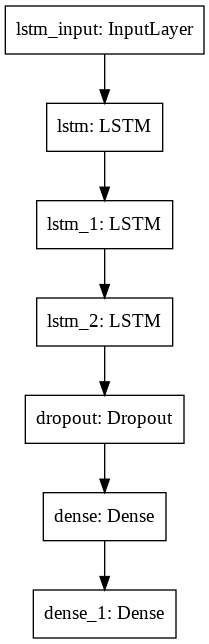

In [53]:
#Architecture of LSTM Model
tf.keras.utils.plot_model(model)

In [54]:
#Model Compilation (With Matrics including Macro and Micro F1 Score and AUC Score)
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=[
                       tf.keras.metrics.MeanAbsoluteError(),
                      ])

In [55]:
%%time
#Callbacks
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
es= EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1) #pat=10
#Model Fitting
lstm = model.fit(X_train, y_train,  
                    epochs=100, 
                    callbacks=[es],
                    validation_data=(X_test,y_test), 
                    verbose=2,
                    batch_size=128) #64

Epoch 1/100
7/7 - 11s - loss: 0.3161 - mean_absolute_error: 0.4279 - val_loss: 0.9262 - val_mean_absolute_error: 0.7211
Epoch 2/100
7/7 - 3s - loss: 0.1250 - mean_absolute_error: 0.2684 - val_loss: 0.6825 - val_mean_absolute_error: 0.5448
Epoch 3/100
7/7 - 3s - loss: 0.0984 - mean_absolute_error: 0.2299 - val_loss: 0.6239 - val_mean_absolute_error: 0.5621
Epoch 4/100
7/7 - 3s - loss: 0.0874 - mean_absolute_error: 0.2158 - val_loss: 0.5480 - val_mean_absolute_error: 0.5031
Epoch 5/100
7/7 - 3s - loss: 0.0722 - mean_absolute_error: 0.1997 - val_loss: 0.4779 - val_mean_absolute_error: 0.4261
Epoch 6/100
7/7 - 3s - loss: 0.0676 - mean_absolute_error: 0.1908 - val_loss: 0.4489 - val_mean_absolute_error: 0.4533
Epoch 7/100
7/7 - 3s - loss: 0.0662 - mean_absolute_error: 0.1867 - val_loss: 0.4339 - val_mean_absolute_error: 0.3895
Epoch 8/100
7/7 - 3s - loss: 0.0655 - mean_absolute_error: 0.1880 - val_loss: 0.4094 - val_mean_absolute_error: 0.3805
Epoch 9/100
7/7 - 3s - loss: 0.0663 - mean_abso

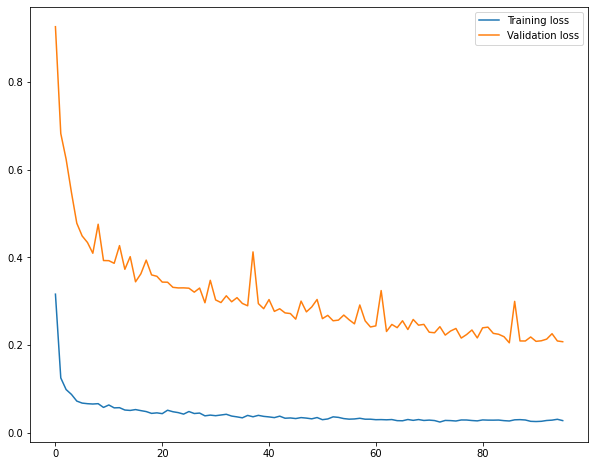

In [56]:
#Plotting Traning and Validation Loss of LSTM Architecture
plt.plot(lstm.history['loss'], label='Training loss')
plt.plot(lstm.history['val_loss'], label='Validation loss')
plt.legend()

In [57]:
# Perform predictions
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [58]:
#Perfoming Inverse Transformation to get original data
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

In [59]:
#Performing Inverse Transformation of Close Price
y_test=scale.inverse_transform(y_test)
y_train=scale.inverse_transform(y_train)

In [60]:
#Calculating Mean Absolute Error on Test Data
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test_predict, y_test)
print("Mean Absolute Error on Test Data:",MAE)

MAE2 = mean_absolute_error(train_predict, y_train)
print("Mean Absolute Error on Train Data:",MAE2)

Mean Absolute Error on Test Data: 0.1191366915088082
Mean Absolute Error on Train Data: 0.045161347751375994


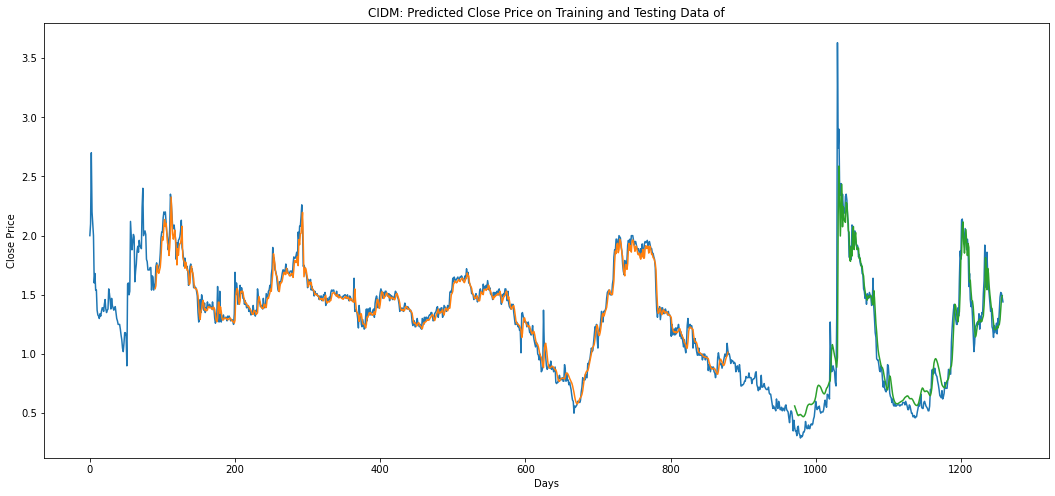

In [61]:
# Shifting the Training predictions to past 90 days for plotting
look_back=90
plt.figure(figsize=(18,8))
trainPredictPlot = numpy.empty_like(stock_data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shifting test predictions for plotting
testPredictPlot = numpy.empty_like(stock_data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(stock_data1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scale.inverse_transform(stock_data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("CIDM: Predicted Close Price on Training and Testing Data of")
plt.show()


Here, The Blue Line Depicts original close price,
Orange Line is the Prediction on Training Data and
Green line is the prediction on Testing Data


In [62]:
#length of Test Data
a=len(test_data)
print("Length of Test Data:",a)

Length of Test Data: 378


In [63]:
#Taking the Past 90 days for Predicting Future ( Size of Test Data -90)
x_input=test_data[288:].reshape(1,-1)
x_input.shape

(1, 90)

In [64]:
#Creating a Temp List to list the past input days
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

Taking Moving Window of Past 90 Days and Predicting for next day and then appending the predicted output in test data and then moving the window forward by 1 day for predicting the next day. Hence, this cycle will repeat till next 30 days.

In [65]:
#Predicting for the Next 30 days
from numpy import array

next_output=[]
n_steps=90
i=0
while(i<30):
    
    if(len(temp_input)>90):
      
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
      
        next_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        next_output.extend(yhat.tolist())
        i=i+1
    
print(next_output)

[0.29991794]
91
1 day input [-1.29507482 -1.40387779 -1.42563836 -1.44739892 -1.31683539 -1.46915949
 -1.42563836 -1.36035652 -1.16451128 -1.27331425 -1.27331425 -1.27331425
 -1.12099014 -0.92514477 -0.94690534 -1.01218717 -1.01218717 -0.42465118
 -0.16352411  0.03232101  0.18464524  0.27168752  0.11936354 -0.01120013
 -0.0982424  -0.0982424   0.20640581  0.05408183  0.72865997  1.25091412
  1.09858988  1.81668967  1.83845024  1.5773229   1.38147753  1.53380177
  1.66436518  1.46852006  1.27267469  1.46852006  1.33795639  0.59809656
  0.83746281  0.35873005  0.22816638  0.31520891  0.05408183 -0.25056664
 -0.59873599 -0.44641175 -0.14176354 -0.12000297 -0.07648183 -0.05472127
 -0.0982424   0.09760297 -0.18528467  0.05408183 -0.05472127  0.11936354
  0.09760297  0.46753289  0.7068994   1.35971696  0.85922363  0.57633573
  1.22915355  0.81570224  0.61985713  0.46753289  0.29344808  0.14112411
  0.20640581 -0.14176354 -0.18528467 -0.33760891 -0.12000297 -0.25056664
 -0.16352411 -0.0764818

In [66]:
#Length of Predicted Data
len(next_output)

30

In [67]:
#Taking Past 90 days lookback to predict next 30 days stock market trends
day_new=np.arange(1,91)
day_pred=np.arange(91,121)

In [68]:
len(stock_data1)

1259

Text(0, 0.5, 'Close Price')

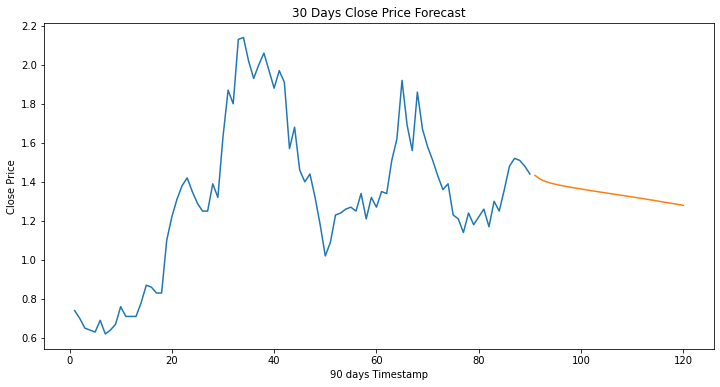

In [69]:
#Plotting the Future Prediction
plt.figure(figsize=(12,6))
plt.plot(day_new,scale.inverse_transform(stock_data1[1169:])) #Taking past 90 days for forecast of next 30 days
plt.plot(day_pred,scale.inverse_transform(next_output))
plt.title("30 Days Close Price Forecast")
plt.xlabel("90 days Timestamp")
plt.ylabel("Close Price")

Here, Orange line is The forecasted close price movement of next 30 days.

Text(0, 0.5, 'Close Price')

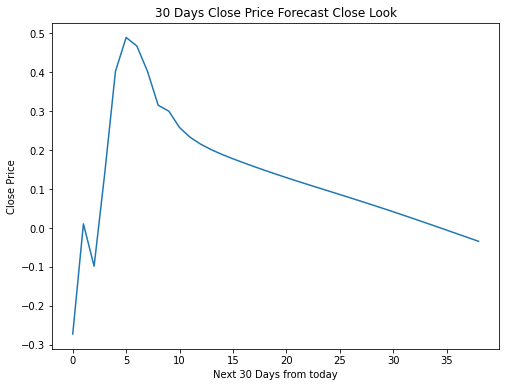

In [70]:
#Merging the Plot
plt.figure(figsize=(8,6))
df3=stock_data1.tolist()
df3.extend(next_output)
#Plotting the Graph from 1250 for Better Visualization
plt.plot(df3[1250:])
plt.title("30 Days Close Price Forecast Close Look")
plt.xlabel("Next 30 Days from today")
plt.ylabel("Close Price")

This Graph gives close look at forecasted close price movement for next 30 days.

In [71]:
#Perfoming Inverse Transformation to get original data
normal_output=scale.inverse_transform(next_output)

In [72]:
#Converting to Dataframe
normal_output=pd.DataFrame(normal_output)

Here, I am Creating a list of Next 30 Days Dates excluding the weekends on which stock market is closed.

In [73]:
#Creating the List of Next 30 days Dates
import datetime 
i=0
weekdays=[]
for i in range(50):
  if len(weekdays)<30:
    NextDay_Date = datetime.datetime.today() + datetime.timedelta(days=i+1)
    if NextDay_Date.isoweekday()!=6 and NextDay_Date.isoweekday()!=7:
      weekdays.append(NextDay_Date)

In [74]:
#Strip the date in Y-M-D Format
dates=[]
for i in weekdays:
  a= i.strftime("%Y-%m-%d")
  dates.append(a)

In [75]:
#Converting to Dataframe
dates=pd.DataFrame(dates)

In [76]:
#Merging Future Dates and Predicted Values
final=dates.merge(normal_output,how='left',on=dates.index)

#Reset Index
final.set_index('0_x',inplace=True)

#Drop Previous Index
final.drop(columns='key_0', inplace=True)

In [77]:
#Rename the Dataframe Name
final.rename(columns = {"0_y":"Predicted"}, inplace = True)
final.index.names = ['Date']

In [78]:
print("""Next 30 Days Forecasted Close Price""")
#Creating a Table to store the above output.

from tabulate import tabulate
print(tabulate(final,headers="keys",tablefmt="fancy_grid"))

Next 30 Days Forecasted Close Price
╒════════════╤═════════════╕
│ Date       │   Predicted │
╞════════════╪═════════════╡
│ 2021-05-03 │     1.43297 │
├────────────┼─────────────┤
│ 2021-05-04 │     1.4137  │
├────────────┼─────────────┤
│ 2021-05-05 │     1.40211 │
├────────────┼─────────────┤
│ 2021-05-06 │     1.39387 │
├────────────┼─────────────┤
│ 2021-05-07 │     1.38737 │
├────────────┼─────────────┤
│ 2021-05-10 │     1.38183 │
├────────────┼─────────────┤
│ 2021-05-11 │     1.37681 │
├────────────┼─────────────┤
│ 2021-05-12 │     1.37208 │
├────────────┼─────────────┤
│ 2021-05-13 │     1.36752 │
├────────────┼─────────────┤
│ 2021-05-14 │     1.36309 │
├────────────┼─────────────┤
│ 2021-05-17 │     1.35879 │
├────────────┼─────────────┤
│ 2021-05-18 │     1.3546  │
├────────────┼─────────────┤
│ 2021-05-19 │     1.35051 │
├────────────┼─────────────┤
│ 2021-05-20 │     1.34649 │
├────────────┼─────────────┤
│ 2021-05-21 │     1.34253 │
├────────────┼─────────────┤
│ 2021-

Text(0, 0.5, 'Close Price')

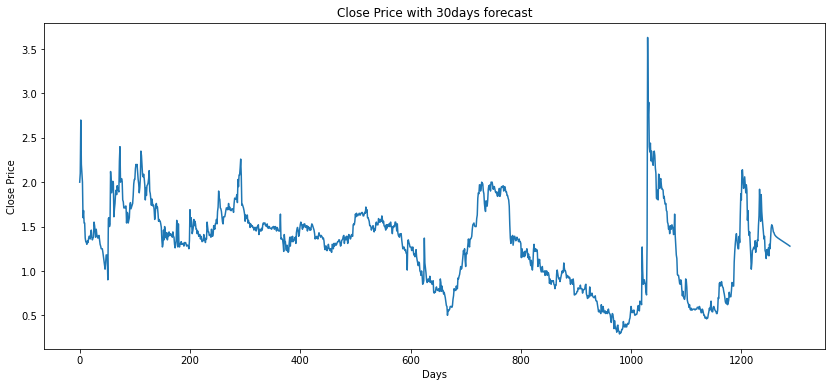

In [79]:
#Retransforming the data back to original form to visualize the future trend
df3=scale.inverse_transform(df3).tolist()
plt.figure(figsize=(14,6))
plt.plot(df3)
plt.title("Close Price with 30days forecast")
plt.xlabel("Days")
plt.ylabel("Close Price")

This Graph is represents original close price with extension of predicted close price for next 30 days.